In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from os import listdir

from rslrecognition.settings.paths import DATA_DIR

In [32]:
SLOVO_DIR = DATA_DIR / 'slovo'

In [33]:
annotations = pd.read_csv(SLOVO_DIR / 'annotations.csv', sep='\t')
annotations.head()

,attachment_id,text,user_id,height,width,length,train
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,76.0,True
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,40.0,True
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,57.0,True
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,64.0,True
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,84.0,True


In [34]:
train = annotations[annotations['train']]
test = annotations[~annotations['train']]
train.head()

,attachment_id,text,user_id,height,width,length,train
0,44e8d2a0-7e01-450b-90b0-beb7400d2c1e,Ё,185bd3a81d9d618518d10abebf0d17a8,1920,1080,76.0,True
1,df5b08f0-41d1-4572-889c-8b893e71069b,А,185bd3a81d9d618518d10abebf0d17a8,1920,1080,40.0,True
2,17f53df4-c467-4aff-9f48-20687b63d49a,Р,185bd3a81d9d618518d10abebf0d17a8,1920,1080,57.0,True
3,e3add916-c708-4339-ad98-7e2740be29e9,Е,185bd3a81d9d618518d10abebf0d17a8,1920,1080,64.0,True
4,bd7272ed-1850-48f1-a2a8-c8fed523dc37,Ч,185bd3a81d9d618518d10abebf0d17a8,1920,1080,84.0,True


In [35]:
test.head()

,attachment_id,text,user_id,height,width,length,train
15300,21e63b4c-1142-4c8b-b907-cbd15564c5d8,Д,ca6b767f0cccf093ba737ae2fc4fec3d,1920,1080,56.0,False
15301,3061ca4a-3b22-4ff5-86f9-3b6dbf6492ae,Т,ca6b767f0cccf093ba737ae2fc4fec3d,1920,1080,47.0,False
15302,22a5521c-f197-4c62-865a-6d3b0f925cd8,Ё,0ab4f8e463cdded2e59d6001f4e1b487,1080,1920,37.0,False
15303,36310c20-ba6c-4433-9d66-e4f53ba9a1f4,Ж,ca6b767f0cccf093ba737ae2fc4fec3d,1920,1080,43.0,False
15304,5a8415dd-3be5-4343-9c4a-9b1c265e1cb4,К,0ab4f8e463cdded2e59d6001f4e1b487,1080,1920,34.0,False


In [36]:
train['attachment_id'].apply(lambda id: f'{id}.mp4').tolist()

['44e8d2a0-7e01-450b-90b0-beb7400d2c1e.mp4',
 'df5b08f0-41d1-4572-889c-8b893e71069b.mp4',
 '17f53df4-c467-4aff-9f48-20687b63d49a.mp4',
 'e3add916-c708-4339-ad98-7e2740be29e9.mp4',
 'bd7272ed-1850-48f1-a2a8-c8fed523dc37.mp4',
 'eced728b-ec24-4f91-a967-7377542a23e6.mp4',
 'cf6845ac-9e02-49b4-8d2b-f56c789f973a.mp4',
 '330fc737-22a8-419b-9e46-b9af6adef8bf.mp4',
 'a5948d20-283a-45d4-8ab3-9c63f35db522.mp4',
 '3f0389e8-fe70-41b0-806d-8c1aae3d20c1.mp4',
 '63e80a5b-b194-4274-9add-f79749617b39.mp4',
 '5ce6ce8a-d191-47d4-97b4-3fc6f9138a73.mp4',
 '9603023d-a2e3-449b-8f68-2e345bb5ca6e.mp4',
 '04c2dca4-30cc-4dda-99c8-f5e84be0e365.mp4',
 'f5d433fa-72df-4784-a001-40eb2c401546.mp4',
 '06000f55-6f8e-404b-a01c-a32f4a384590.mp4',
 '2225775d-2fb2-4e3b-be84-b3679dc1a4fb.mp4',
 'f2584ae6-660a-444d-8178-e32378d1b592.mp4',
 'cdccffee-ea5c-4e89-8454-c99d8d8f8b9e.mp4',
 '95b13c61-afa4-4b56-92a9-64f42fe9f572.mp4',
 'ed900e13-7b49-4af3-89de-616fbdabdaab.mp4',
 '640469f8-d647-46a9-be8b-63b45e85416f.mp4',
 '39e0e8d5

In [37]:
TRAIN_DIR = SLOVO_DIR / 'train'

Давайте посмотрим все ли файлы из аннотаций есть

In [38]:
print('No duplicate files -', train['attachment_id'].nunique() == train['attachment_id'].shape[0])

No duplicate files - True


In [39]:
print('All train videos avaliable and there\'s no unannotated files -', Counter(listdir(TRAIN_DIR)) == Counter(train['attachment_id'].apply(lambda id: f'{id}.mp4').tolist()))

All train videos avaliable and there's no unannotated files - True


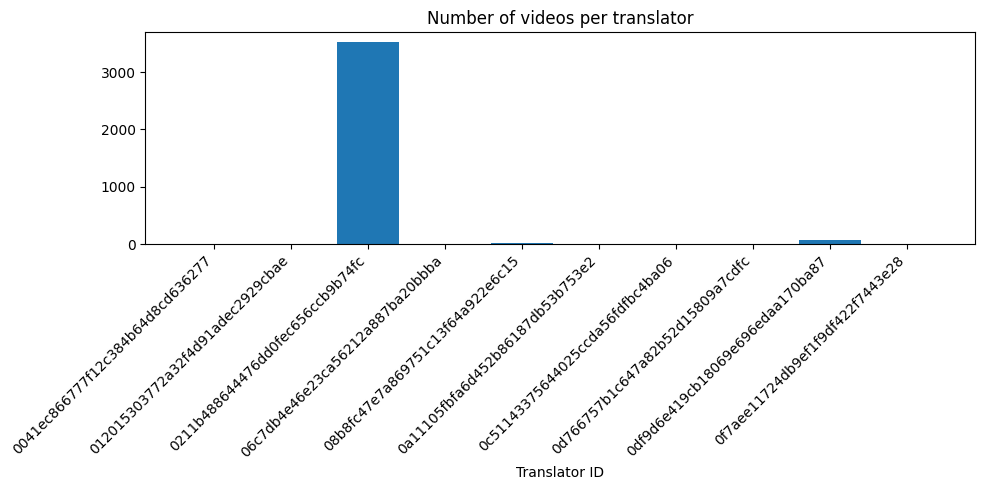

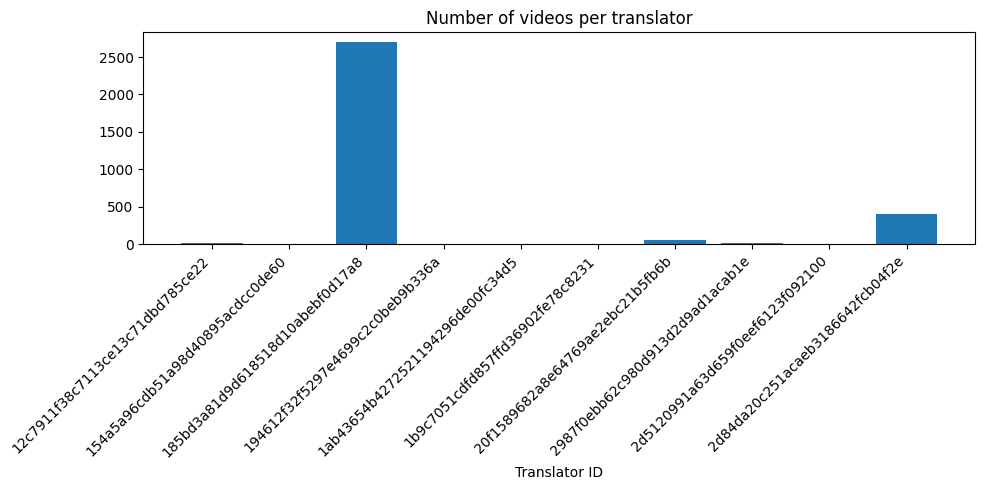

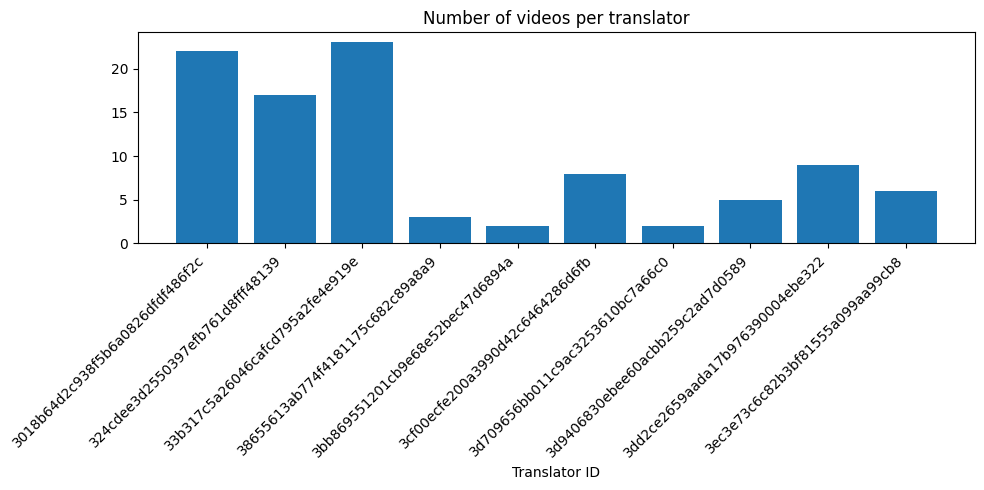

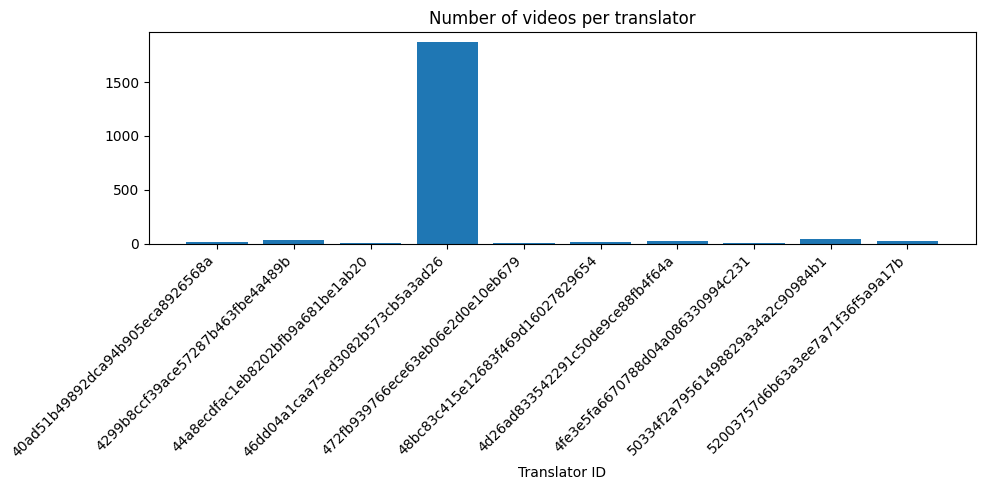

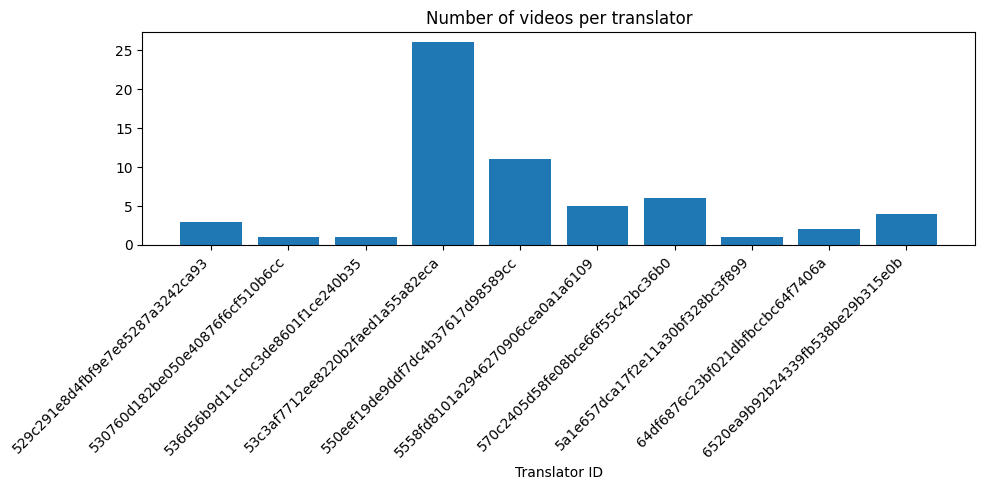

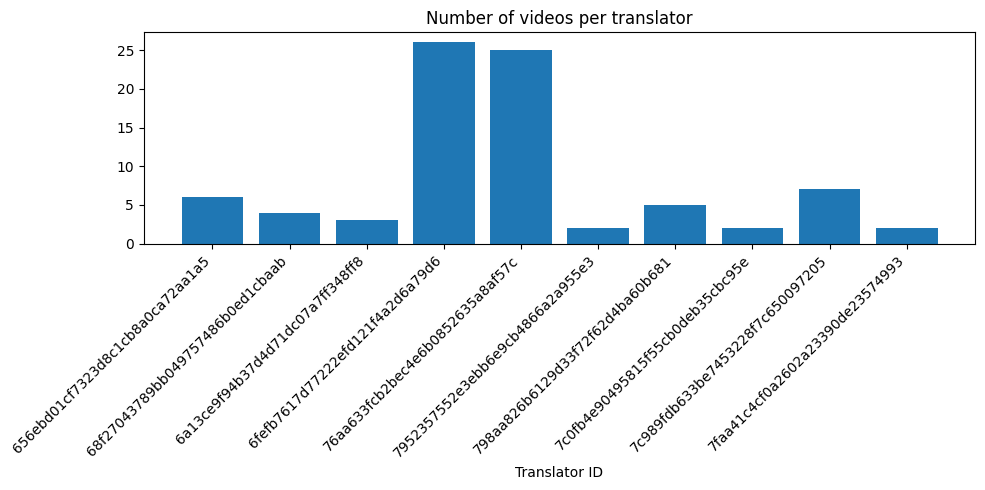

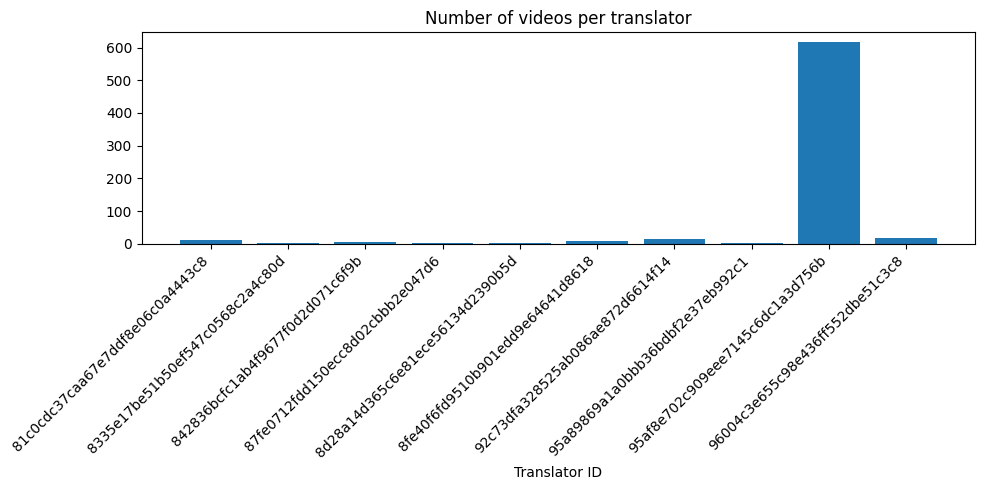

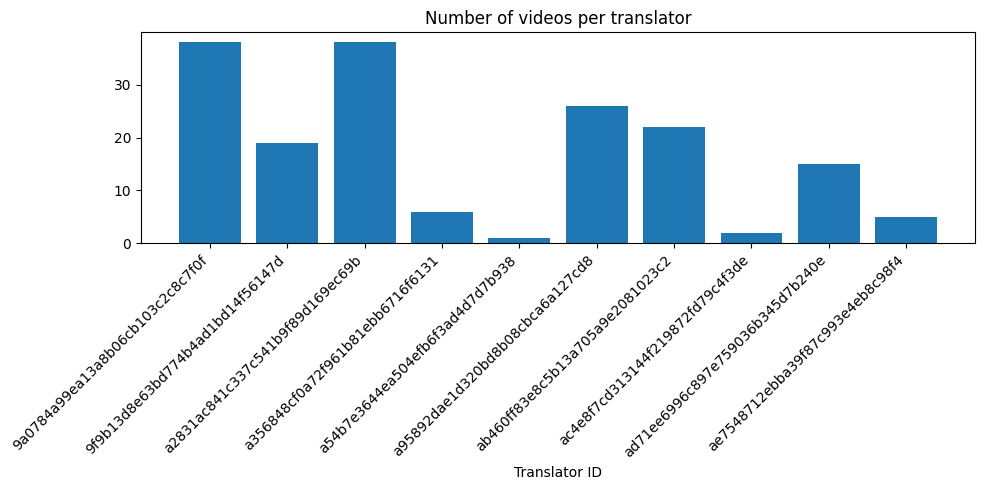

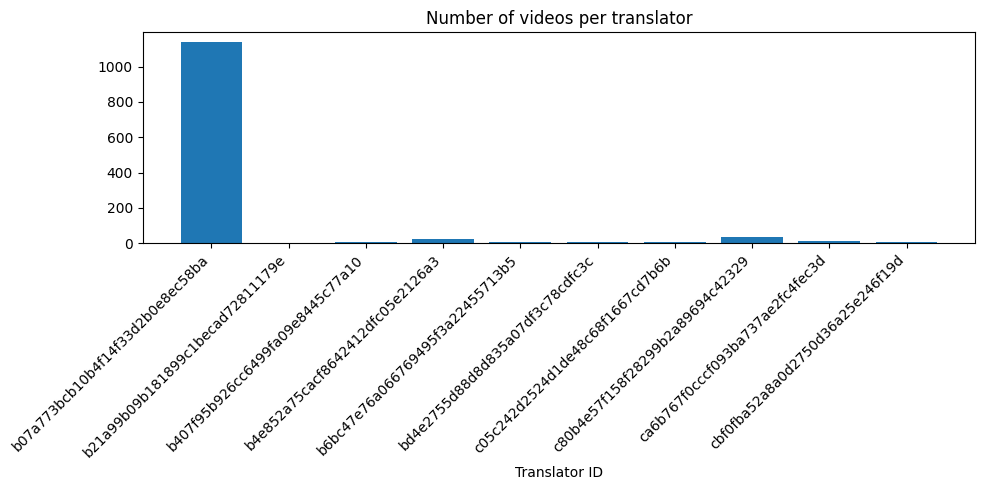

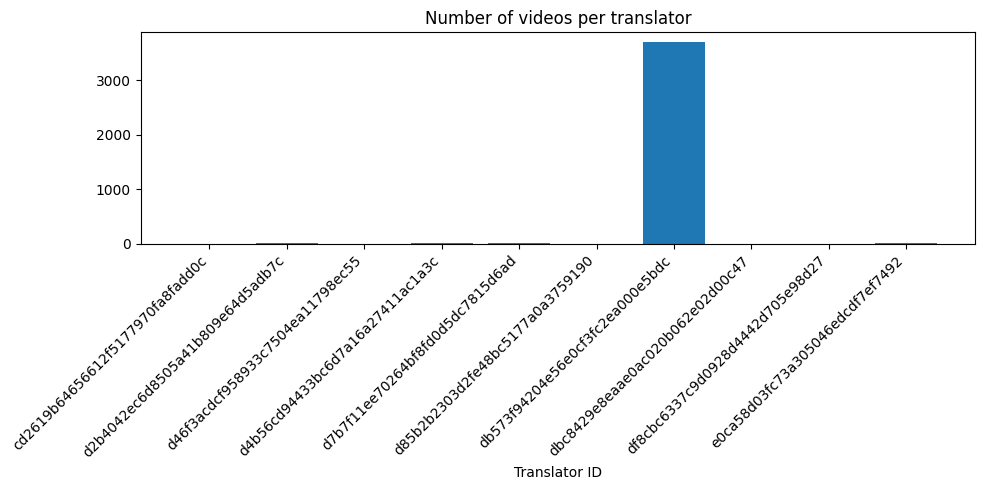

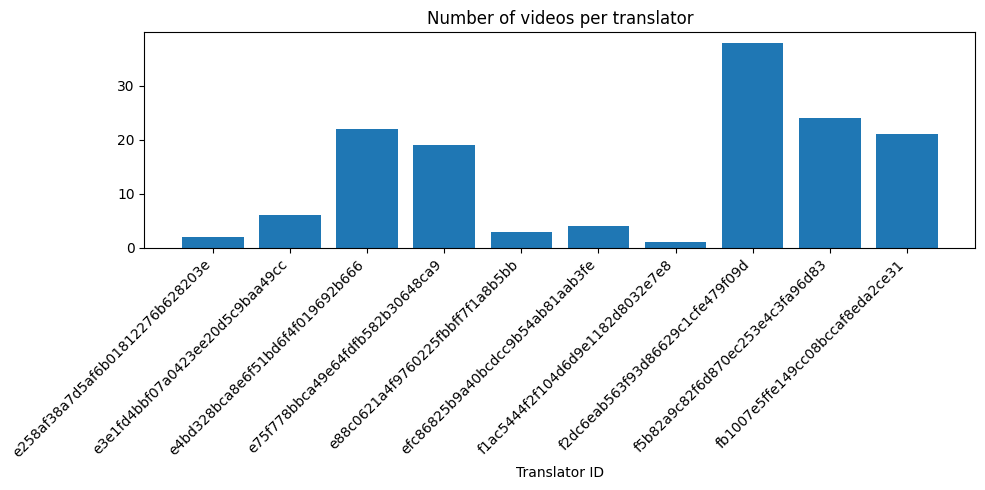

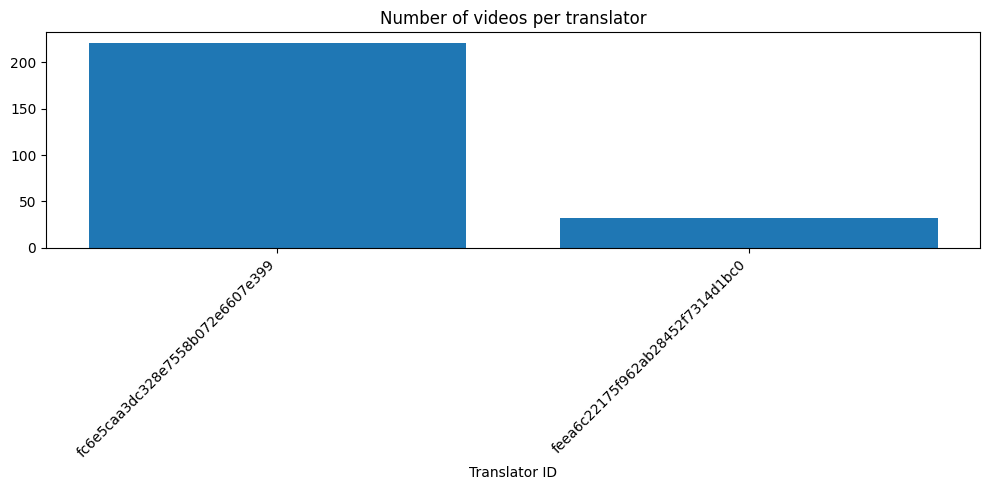

In [54]:
translator_videos = train.groupby('user_id')['attachment_id'].count()
translators = translator_videos.index.to_numpy()
videos_count = translator_videos.to_numpy()
batch_size = 10
for i in range(0, len(translators), batch_size):
	end = i + batch_size
	chunk_translators = translators[i:end]
	chunk_videos_count = videos_count[i:end]

	fig, ax = plt.subplots(figsize=(10, 5))
	ax.bar(chunk_translators, chunk_videos_count)
	ax.set_title('Number of videos per translator')
	ax.set_xlabel('Translator ID')

	plt.xticks(rotation=45, ha='right')

	plt.tight_layout()
	plt.show()


In [ ]:
# Let's see how many translators that have less than 100 videos
few_videos_translators = translator_videos[translator_videos < 100]
few_videos_translators.count()

np.int64(104)

Как видим из исследования есть высокий риск обучить под самого переводчика, что может негативно сказаться на обобщающей способности модели.

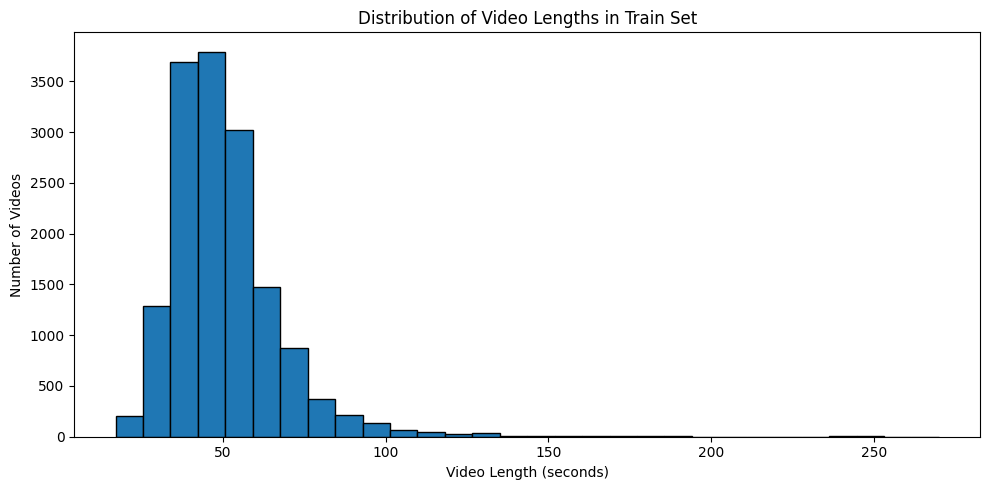

In [56]:
# Now let's see the distribution of video lengths in the train set
train_lengths = train['length']
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(train_lengths, bins=30, edgecolor='black')
ax.set_title('Distribution of Video Lengths in Train Set')
ax.set_xlabel('Video Length (seconds)')
ax.set_ylabel('Number of Videos')
plt.tight_layout()
plt.show()